<a href="https://colab.research.google.com/github/jrtorresb/Proyecto_Final_FC_Proyecto_I/blob/main/GCP_Proyecto_I_Data_Science_Credit_Cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Credit card applications
<p>Los bancos comerciales reciben muchas solicitudes de tarjetas de crédito. Muchos de ellos son rechazados por muchas razones, como saldos elevados de préstamos, bajos niveles de ingresos o demasiadas consultas sobre el informe crediticio de una persona, por poner algunos ejemplos. El análisis manual de dichos métodos se vuelve cada vez más obsoelto, propenso a errores y requiere mucho tiempo y claramente el tiempo es dinero. Afortunadamente, esta tarea se puede automatizar con el poder del aprendizaje automático y casi todos los bancos comerciales lo hacen hoy en día. En este cuaderno, crearemos un predictor automático de aprobación de tarjetas de crédito utilizando técnicas de aprendizaje automático, tal como lo hacen los bancos reales.</p>
<p><img src="https://d31dn7nfpuwjnm.cloudfront.net/images/valoraciones/0029/4204/tarjeta-credito-rechazada.png?1517315638" alt="Credit card"></p>
<p>Fuente: <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> del repositorio: UCI Machine Learning Repository.</p>
<ul>
<li>Primero, comenzaremos cargando y viendo el conjunto de datos.</li>
<li>Veremos que el conjunto de datos tiene una combinación de características numéricas y no numéricas, que contiene valores de diferentes rangos, además de que contiene una cantidad de entradas faltantes./li>
<li>Tendremos que preprocesar el conjunto de datos para asegurarnos de que el modelo de aprendizaje automático que elegimos pueda hacer buenas predicciones.</li>
<li>Una vez que nuestros datos estén en buena forma, haremos un análisis de datos exploratorio para construir nuestras intuiciones.</li>
<li>Finalmente, crearemos un modelo de aprendizaje automático que puede predecir si se aceptará la solicitud de una persona para una tarjeta de crédito.</li>
</ul>
<p>
Primero, cargar y ver el conjunto de datos. Descubrimos que, dado que estos datos son confidenciales, el contribuyente del conjunto de datos ha anonimizado los nombres de las funciones.</p>

In [1]:
# Librerías básicas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import platform
import joblib

In [2]:
# Estilo a utilizar de las gráficas
plt.style.use("ggplot")

In [3]:
# Versiones de las librerías
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Sistema:", platform.platform())

Numpy version: 1.19.5
Pandas version: 1.1.5
Seaborn version: 0.11.1
Sistema: Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic


In [4]:
print("Versión de Python sobre el que se va a relizar el trabajo:", sys.version)

Versión de Python sobre el que se va a relizar el trabajo: 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]


In [5]:
# Authenticate to your cloud account
#from google.colab import auth
#auth.authenticate_user()

In [6]:
# Convertimos la collección a un DataFrame de Pandas
df = pd.read_csv('https://storage.googleapis.com/proyecto-ml-fciencias/Credit_Card.csv')

In [7]:
# Encabezado
df.head()

,_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,604bb934e4ed841a35df1cd7,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
1,604bb934e4ed841a35df1cdd,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
2,604bb934e4ed841a35df1cfa,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,f,g,00260,500,+
3,604bb934e4ed841a35df1d06,a,25.75,0.500,u,g,c,h,0.875,t,f,0,t,g,00491,0,+
4,604bb934e4ed841a35df1d10,b,56.75,12.250,u,g,m,v,1.250,t,t,4,t,g,00200,0,+


In [8]:
# SI SE QUIERE IMPORTAR EL DATASET DESDE BIGQUERY

# Set environment variables for your notebook
# import os 
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/jrtorres24-404e25be6644.json'

#Imports google cloud client library and initiates BQ service
#from google.cloud import bigquery
#bigquery_client = bigquery.Client()

#Write Query on BQ
#QUERY = """
#SELECT 
#* 
#FROM 
#`jrtorres24.proyecto_ml_fc_credit_card.Credit_Card`
"""
#Run the query and write result to a pandas data frame
Query_Results = bigquery_client.query(QUERY)
df = Query_Results.to_dataframe()
#View top few rows of result
df.head()"""

'\n#Run the query and write result to a pandas data frame\nQuery_Results = bigquery_client.query(QUERY)\ndf = Query_Results.to_dataframe()\n#View top few rows of result\ndf.head()'

## 2. Explorando el conjunto de datos
<p> El resultado puede parecer un poco confuso a primera vista, pero intentemos descubrir las características más importantes de una aplicación de tarjeta de crédito. Las funciones de este conjunto de datos se han anonimizado para proteger la privacidad, pero <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html"> este blog </a> nos brinda una descripción de las características probables. Las características probables en una aplicación de tarjeta de crédito típica son <code> Género </code>, <code> Edad </code>, <code> Debt </code>, <code> Married </code>, <code> BankCustomer </code>, <code> EducationLevel </code>, <code> Ethnicity </code>, <code> YearsEmployed </code>, <code> PriorDefault </code>, <code> Employed </code>, <code> CreditScore </code>, <code> DriversLicense </code>, <code> Citizen </code>, <code> ZipCode </code>, <code> Income </code> y finalmente el <code> ApprovalStatus </code>. Esto nos da un buen punto de partida y podemos mapear estas características con respecto a las columnas en la salida. </p>
<p> Como podemos ver en nuestro primer vistazo a los datos, el conjunto de datos tiene una combinación de características numéricas y no numéricas. Esto se puede solucionar con un poco de procesamiento previo, pero antes de hacerlo, aprendamos un poco más sobre el conjunto de datos para ver si hay otros problemas del conjunto de datos que deban solucionarse. </p>


Podemos observar que el conjunto de datos no cuenta con nombres de las columnas
dado que los datos son confidenciales por lo tanto no existen nombres de las columnas pero según  <a href="https://nycdatascience.com/blog/student-works/credit-card-approval-analysis/"> la página </a> las columnas se pueden infererir quedano de la siguiente manera:

* Male
* Age
* Debt
* Married
* BankCustomer
* EducationLevelw
* Ethnicity
* YearsEmployed
* PriorDefault
* Employed
* CreditScore
* DriversLicenset
* Citizen
* ZipCode
* Income
* Approved

Por lo que se procede a cambiar el nombre de las columnas.

Nuestra variable objetivo es **Approved**.

In [9]:
# Encabezado del DataFrame
df.head()

,_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,604bb934e4ed841a35df1cd7,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
1,604bb934e4ed841a35df1cdd,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
2,604bb934e4ed841a35df1cfa,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,f,g,00260,500,+
3,604bb934e4ed841a35df1d06,a,25.75,0.500,u,g,c,h,0.875,t,f,0,t,g,00491,0,+
4,604bb934e4ed841a35df1d10,b,56.75,12.250,u,g,m,v,1.250,t,t,4,t,g,00200,0,+


In [10]:
# Número de filas y columnas
print(f'{df.shape[0]} filas \n{df.shape[1]} columnas') 

690 filas 
17 columnas


In [11]:
# La primera columna es un id lo mismo que la columna 13, se borran.
df.drop('_id', axis='columns', inplace=True)

In [12]:
cols = ["Gender",
        "Age",
        "Debt",
        "Married",
        "BankCustomer",
        "EducationLevelw",
        "Ethnicity",
        "YearsEmployed",
        "PriorDefault",
        "Employed",
        "CreditScore",
        "DriversLicense",
        "Citizen",
        "ZipCode",
        "Income",
        "Approved"]

In [13]:
# Cambiando el nombre de las columnas
df.columns = cols

In [14]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
1,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+
2,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,f,g,00260,500,+
3,a,25.75,0.500,u,g,c,h,0.875,t,f,0,t,g,00491,0,+
4,b,56.75,12.250,u,g,m,v,1.250,t,t,4,t,g,00200,0,+


In [15]:
# La columna ZipCode no es relevante para el análisis por ende la eliminamos:
df.drop(['ZipCode','DriversLicense'], axis='columns', inplace=True)

In [16]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,27.83,1.540,u,g,w,v,3.750,t,t,5,g,3,+
1,b,42.50,4.915,y,p,w,v,3.165,t,f,0,g,1442,+
2,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,g,500,+
3,a,25.75,0.500,u,g,c,h,0.875,t,f,0,g,0,+
4,b,56.75,12.250,u,g,m,v,1.250,t,t,4,g,0,+


In [17]:
# Revisamos los tipos de datos
df.dtypes

Gender              object
Age                 object
Debt               float64
Married             object
BankCustomer        object
EducationLevelw     object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
Citizen             object
Income               int64
Approved            object
dtype: object

In [18]:
# Revisamos si el dataset contiene valores nulos
total_null = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Porcentaje %'])
missing_data

,Total,Porcentaje %
Approved,0,0.0
Income,0,0.0
Citizen,0,0.0
CreditScore,0,0.0
Employed,0,0.0
PriorDefault,0,0.0
YearsEmployed,0,0.0
Ethnicity,0,0.0
EducationLevelw,0,0.0
BankCustomer,0,0.0


Pareciera que no hubera valores nulos, esto puede ser muy engañoso ya que como veremos a continuación, ya que si se sacan valores únicos de las variables categóticas se obtienen valores como símbolos de "?" que claramente es un dato faltante.

In [19]:
# Variables categóricas
cathegorical_cols = df.select_dtypes(["object"]).columns.tolist()

for column in cathegorical_cols:
    display(df.groupby(column)[[column]].count())

,Gender
Gender,
?,12
a,210
b,468


,Age
Age,
13.75,1
15.17,1
15.75,1
15.83,2
15.92,1
...,...
73.42,1
74.83,1
76.75,1


,Married
Married,
?,6
l,2
u,519
y,163


,BankCustomer
BankCustomer,
?,6
g,519
gg,2
p,163


,EducationLevelw
EducationLevelw,
?,9
aa,54
c,137
cc,41
d,30
e,25
ff,53
i,59
j,10


,Ethnicity
Ethnicity,
?,9
bb,59
dd,6
ff,57
h,138
j,8
n,4
o,2
v,399


,PriorDefault
PriorDefault,
f,329
t,361


,Employed
Employed,
f,395
t,295


,Citizen
Citizen,
g,625
p,8
s,57


,Approved
Approved,
+,307
-,383


## 3. Tratamiento Valores Faltantes

Como se había comentado el conjunto de datos tiene valores faltantes, dichos  valores están etiquetados con '?', Que se puede ver en la salida de la última celda.

<p>Los valores se reemplazarán con NaN para su posterior tratamiento.</p>

In [20]:
# Es claro observar "?"
df.tail(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
680,b,25.17,6.000,u,g,c,v,1.000,t,t,3,g,0,+
681,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,g,23,+
682,a,29.58,1.750,y,p,k,v,1.250,f,f,0,g,0,-
683,b,?,0.040,y,p,d,v,4.250,f,f,0,g,0,-
684,b,27.58,3.250,y,p,q,h,5.085,f,t,2,g,1,-
685,b,29.42,1.250,u,g,c,h,0.250,f,t,2,g,108,-
686,b,22.17,2.250,u,g,i,v,0.125,f,f,0,g,10,-
687,b,29.83,3.500,u,g,c,v,0.165,f,f,0,g,0,-
688,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,g,0,-


In [21]:
# Reeplazando '?' con NaN
df = df.replace('?', np.nan)

In [22]:
# Inspeccionando
df.tail(10)

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
680,b,25.17,6.000,u,g,c,v,1.000,t,t,3,g,0,+
681,b,25.75,0.750,u,g,c,bb,0.250,t,f,0,g,23,+
682,a,29.58,1.750,y,p,k,v,1.250,f,f,0,g,0,-
683,b,NaN,0.040,y,p,d,v,4.250,f,f,0,g,0,-
684,b,27.58,3.250,y,p,q,h,5.085,f,t,2,g,1,-
685,b,29.42,1.250,u,g,c,h,0.250,f,t,2,g,108,-
686,b,22.17,2.250,u,g,i,v,0.125,f,f,0,g,10,-
687,b,29.83,3.500,u,g,c,v,0.165,f,f,0,g,0,-
688,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,g,237,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,g,0,-


In [23]:
# Si volvemos a identificar valores nulos
total_null = df.isna().sum().sort_values(ascending=False)
percent = (df.isna().sum()/df.isna().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Porcentaje %'])
missing_data

,Total,Porcentaje %
Age,12,1.739130
Gender,12,1.739130
Ethnicity,9,1.304348
EducationLevelw,9,1.304348
BankCustomer,6,0.869565
Married,6,0.869565
Approved,0,0.000000
Income,0,0.000000
Citizen,0,0.000000
CreditScore,0,0.000000


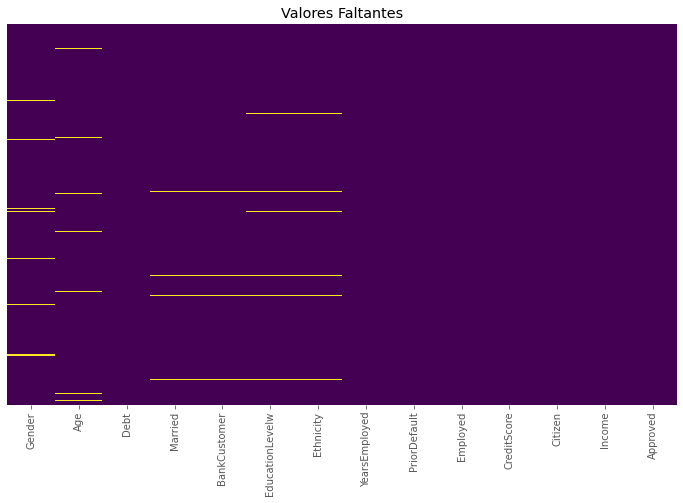

In [24]:
# Se puede utilizar un mapa de calor también donde el amarillo muestra los datos faltantes
plt.figure(figsize=(12,7))
plt.title("Valores Faltantes")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

<p>Ignorar los valores perdidos puede afectar en gran medida el rendimiento de un modelo de aprendizaje automático. Si bien ignora los valores faltantes, nuestro modelo de aprendizaje automático puede perder información sobre el conjunto de datos que puede ser útil para su entrenamiento.</p>

<p> Entonces, para evitar este problema, vamos a imputar los valores faltantes con una estrategia llamada imputación media. </p>

In [25]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,27.83,1.540,u,g,w,v,3.750,t,t,5,g,3,+
1,b,42.50,4.915,y,p,w,v,3.165,t,f,0,g,1442,+
2,b,27.75,0.585,y,p,cc,v,0.250,t,t,2,g,500,+
3,a,25.75,0.500,u,g,c,h,0.875,t,f,0,g,0,+
4,b,56.75,12.250,u,g,m,v,1.250,t,t,4,g,0,+


In [26]:
df.dtypes

Gender              object
Age                 object
Debt               float64
Married             object
BankCustomer        object
EducationLevelw     object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
Citizen             object
Income               int64
Approved            object
dtype: object

In [27]:
# Cambiamos la variable Age decimal
df['Age'] =df['Age'].astype("float")

In [28]:
# Imputamos valores con la media
df.fillna(df.mean(), inplace=True)

# Verificamos que no hay nulos
print(df.isnull().sum())

Gender             12
Age                 0
Debt                0
Married             6
BankCustomer        6
EducationLevelw     9
Ethnicity           9
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
Citizen             0
Income              0
Approved            0
dtype: int64


In [29]:
# El campo edad lo convertimos a entero
df['Age'] = df['Age'].astype('int')

<p> Nos hemos ocupado con éxito de los valores faltantes presentes en las columnas numéricas. Todavía hay algunos valores faltantes que deben imputarse para las columnas Gender, Married, BankCustomer, EducationLevelw, Ethnicity  y 13. Todas estas columnas contienen datos no numéricos y por eso la estrategia de imputación media no funcionaría aquí. Esto necesita un tratamiento diferente. </p>
<p> Vamos a imputar estos valores perdidos con los valores más frecuentes presentes en las columnas respectivas. Esta es una buena práctica cuando se trata de imputar valores faltantes para datos categóricos en general. </p>

In [30]:
# Iterando sobre cada columna
for col in df.columns:
    # Nos quedamos con columnas categoricas
    if df[col].dtypes == 'object':
        # Imputamos con la moda
        df = df.fillna(df[col].value_counts().index[0])

# Verificando nulos
print(df.isnull().sum())

Gender             0
Age                0
Debt               0
Married            0
BankCustomer       0
EducationLevelw    0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
Approved           0
dtype: int64


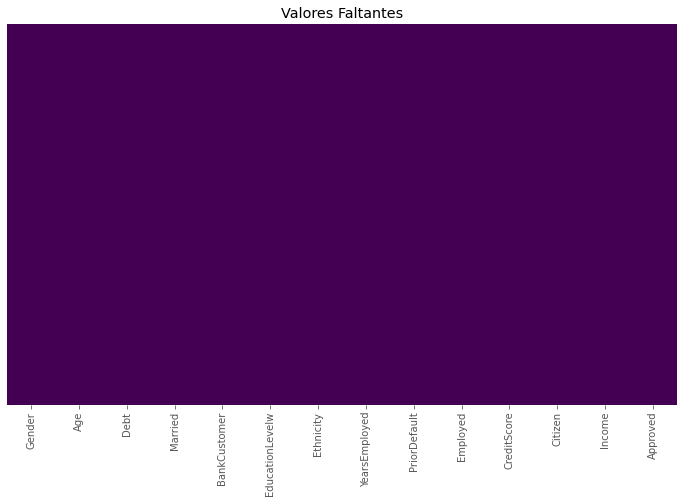

In [31]:
# Heatmap
plt.figure(figsize=(12,7))
plt.title("Valores Faltantes")
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

## 6. Preprocesamiento y Análsis Exploratorio de los datos

<p> Convertiremos todos los valores no numéricos en valores numéricos. Hacemos esto porque no solo da como resultado un cálculo más rápido, sino que también muchos modelos de aprendizaje automático (requieren que los datos estén en un formato estrictamente numérico. Haremos esto usando una técnica llamada LabelEncoder. </p>

In [32]:
# Cambiamos el valor de la variable objetivo Approved, 0 no aprobada y 1 sí aprobada
df['Approved'] = df['Approved'].map({'+':1, '-':0})
df['Approved'] = df['Approved'].astype("int")

In [33]:
df.select_dtypes('object').columns.tolist()

['Gender',
 'Married',
 'BankCustomer',
 'EducationLevelw',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'Citizen']

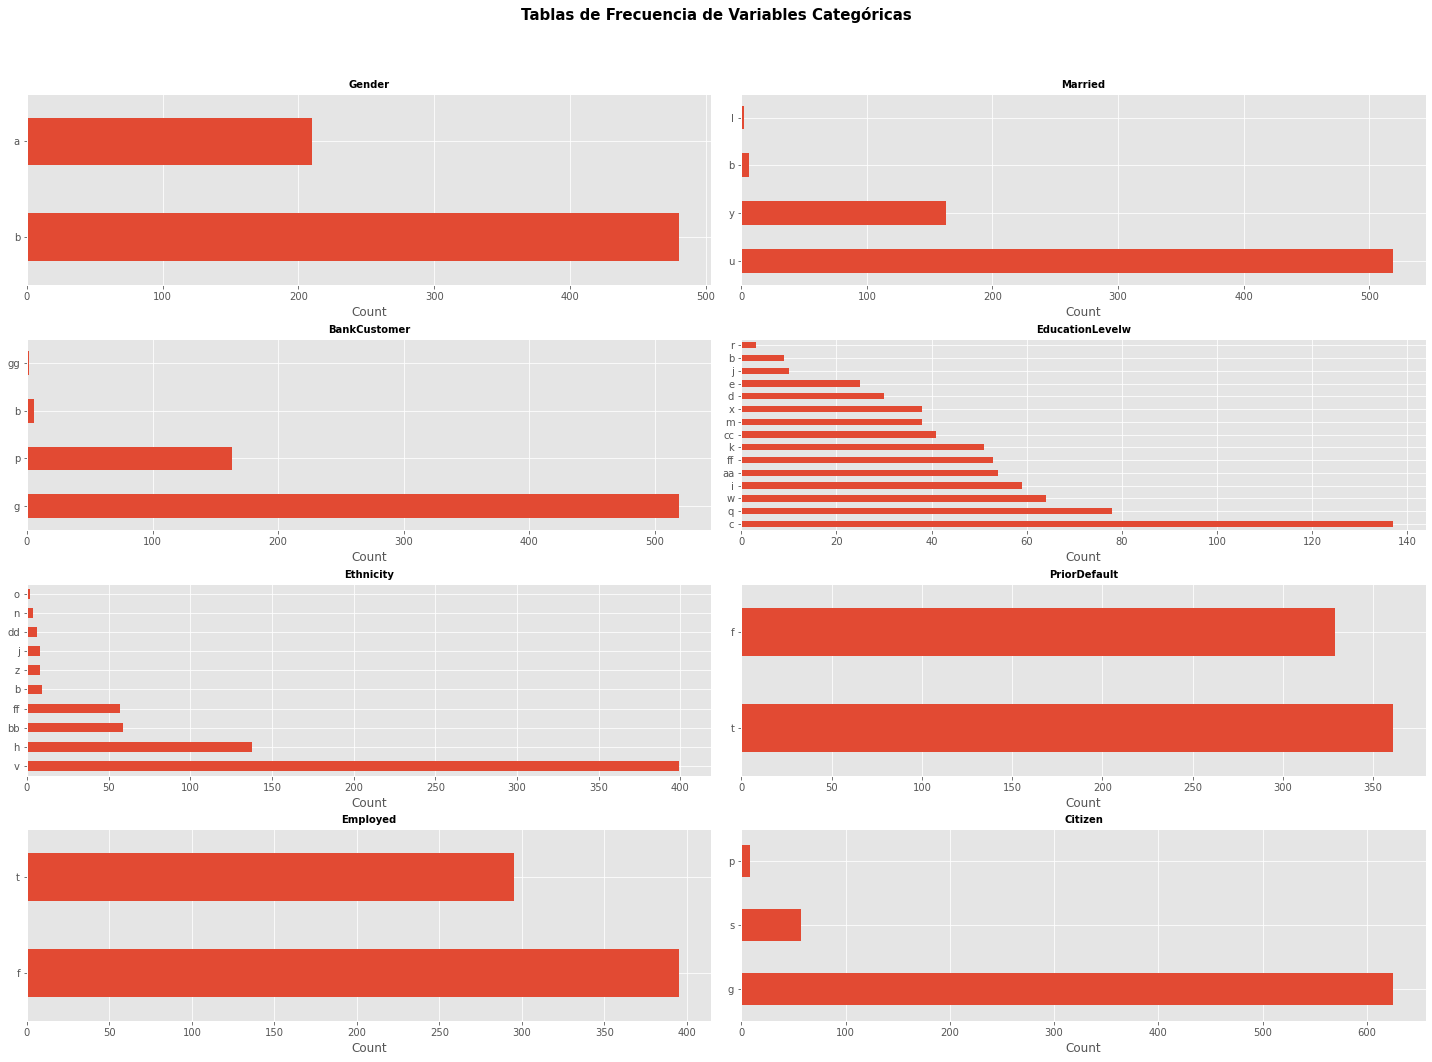

In [34]:
# Gráfica de barras para cada variable cualitativa
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("Count")

# Se eliminan los axes vacíos
#for i in [8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Tablas de Frecuencia de Variables Categóricas',
             fontsize = 15, fontweight = "bold");

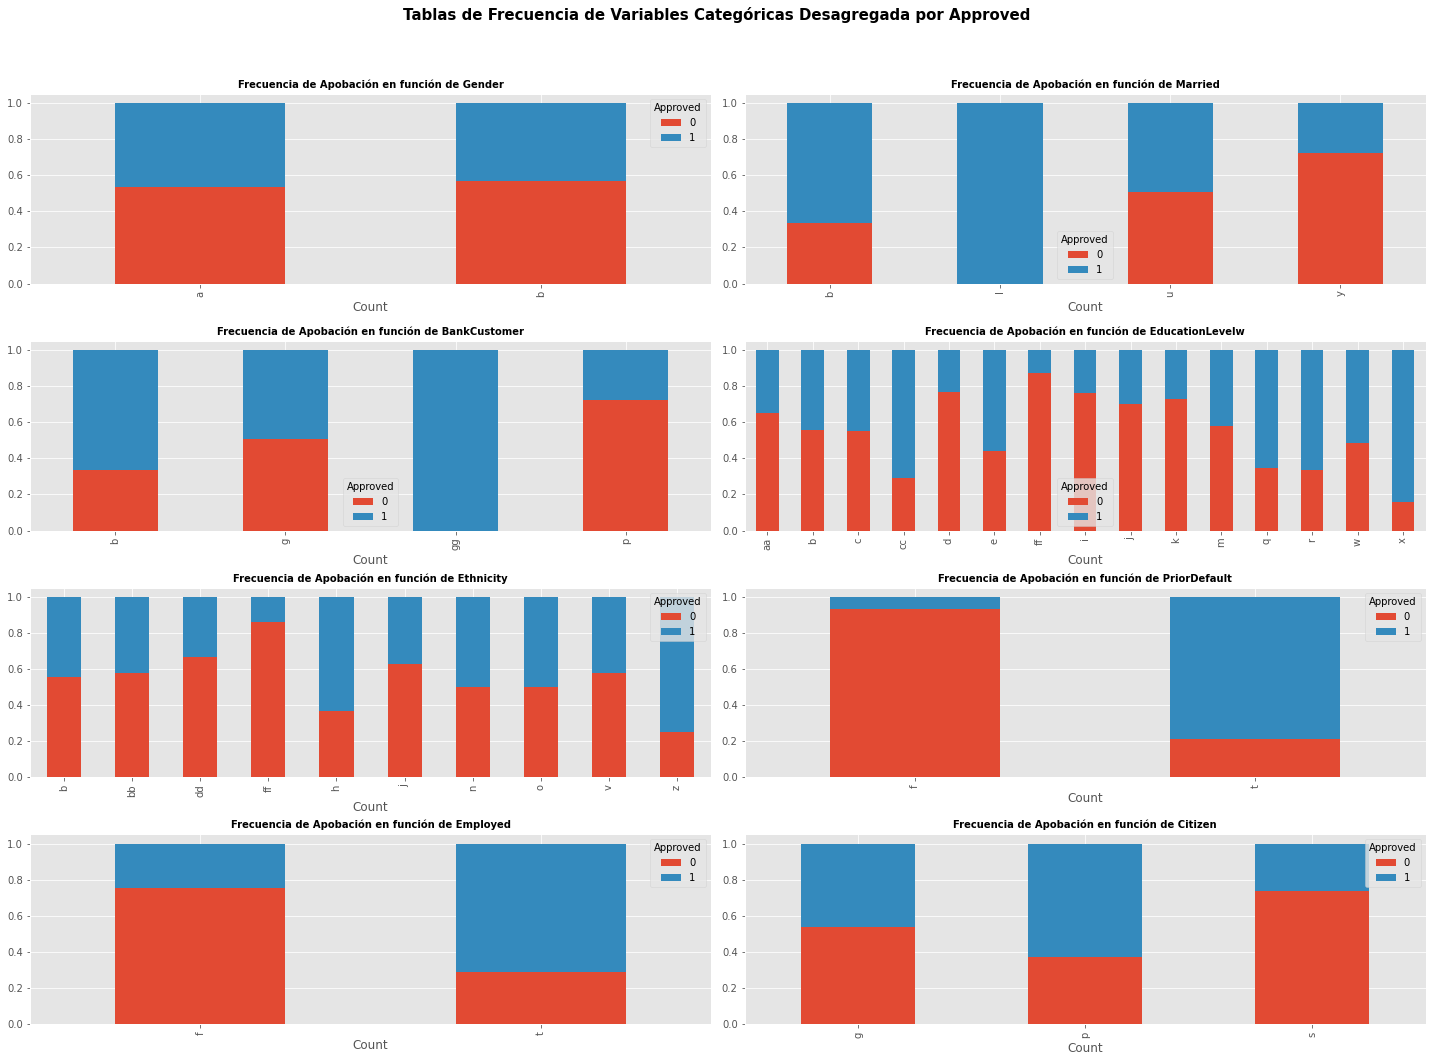

In [35]:
# Gráfica de barras para cada variable cualitativa
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):

    table = pd.crosstab(df[colum], df['Approved'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax = axes[i]) #sum(1) suma por filas
    axes[i].set_title("Frecuencia de Apobación en función de "+colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("Count")


# Se eliminan los axes vacíos
#for i in [7, 8]:
#    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Tablas de Frecuencia de Variables Categóricas Desagregada por Approved',
             fontsize = 15, fontweight = "bold");    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

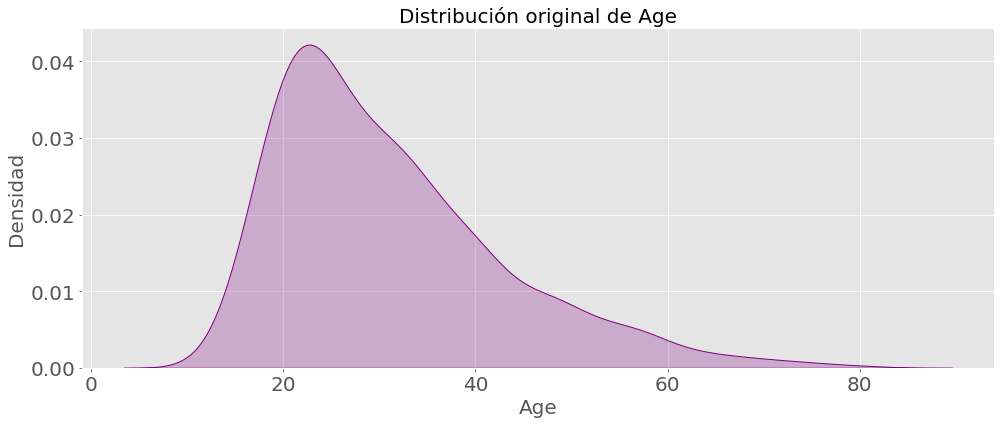

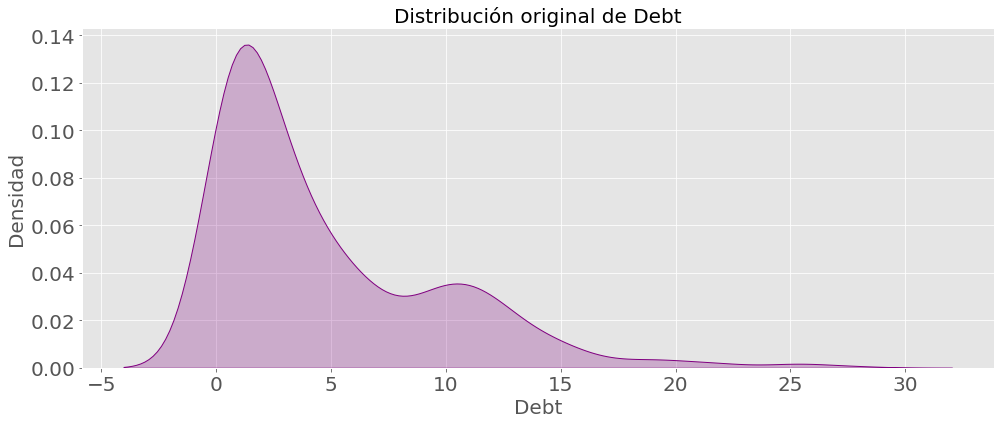

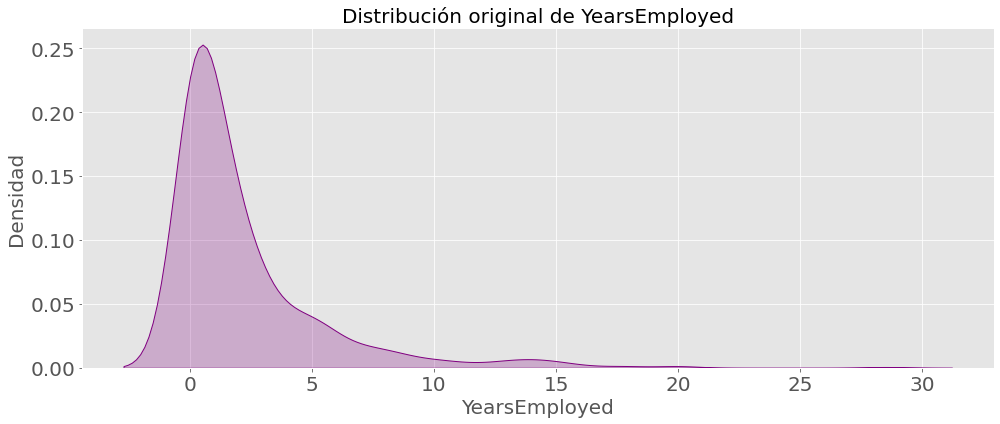

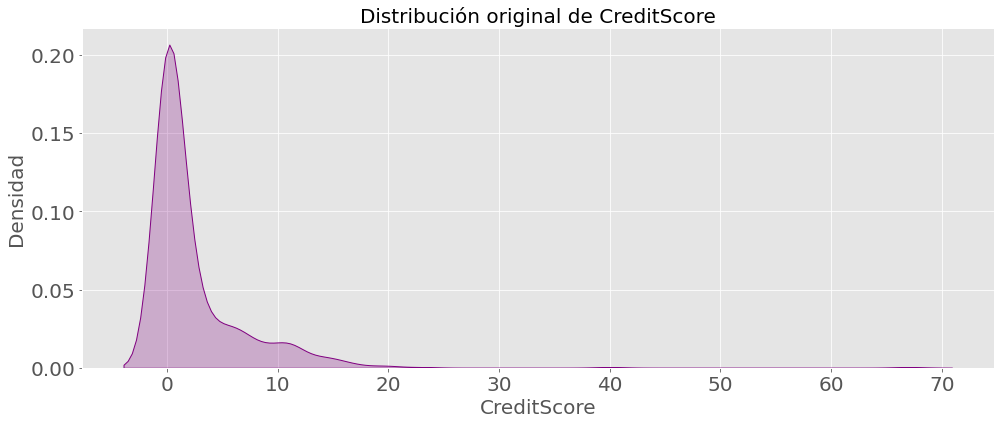

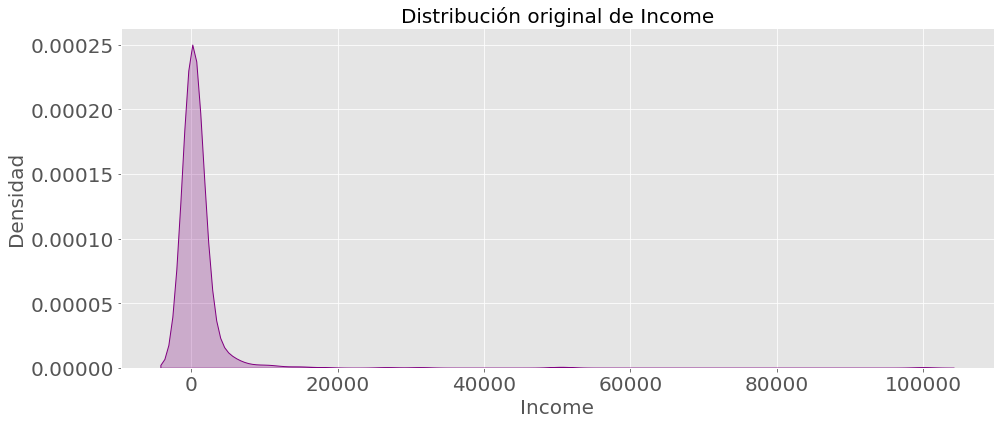

In [36]:
# Gráfico de distribución para cada variable numérica
columnas_numeric = df.select_dtypes(include=['float64', 'int', 'int64']).columns

for i in columnas_numeric[:-1]:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
  sns.distplot(
      df[i],
      hist    = False,
      rug     = False,
      color   = "purple",
      kde_kws = {'shade': True, 'linewidth': 1},

  )
  axes.set_title("Distribución original de "+i, fontsize = 20 )
  axes.set_xlabel(i, fontsize=20) 
  axes.set_ylabel('Densidad', fontsize=20) 
  axes.tick_params(labelsize = 20)
  fig.tight_layout()

In [37]:
# Variable Objetivo porcentajes
total_target = df['Approved'].value_counts().sort_values(ascending=False)
pct = (df['Approved'].value_counts().sort_values(ascending=False)/df['Approved'].count()*100).sort_values(ascending=False)
pct_targert = pd.concat([total_target, pct], axis=1, keys=['Total', 'Percent %'])
pct_targert

,Total,Percent %
0,383,55.507246
1,307,44.492754


Tenemmos clases balancedas.

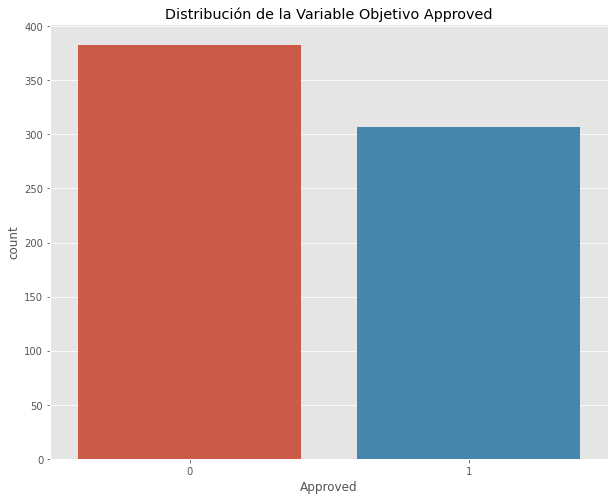

In [38]:
# Disstribución Variable Objetivo
plt.figure(figsize=(10,8))
sns.countplot(x='Approved', data=df)
plt.title("Distribución de la Variable Objetivo Approved")
plt.show()

In [39]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevelw,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Approved
0,b,27,1.540,u,g,w,v,3.750,t,t,5,g,3,1
1,b,42,4.915,y,p,w,v,3.165,t,f,0,g,1442,1
2,b,27,0.585,y,p,cc,v,0.250,t,t,2,g,500,1
3,a,25,0.500,u,g,c,h,0.875,t,f,0,g,0,1
4,b,56,12.250,u,g,m,v,1.250,t,t,4,g,0,1


In [40]:
# Estadísticas básicas
df_description = df.describe()
display(df_description.T)

print("\n")

# Print DataFrame information
df_info = df.info()
print(df.info)

,count,mean,std,min,25%,50%,75%,max
Age,690.0,31.118841,11.852887,13.0,22.000,28.00,37.0000,80.0
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0
Approved,690.0,0.444928,0.497318,0.0,0.000,0.00,1.0000,1.0




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           690 non-null    object 
 1   Age              690 non-null    int64  
 2   Debt             690 non-null    float64
 3   Married          690 non-null    object 
 4   BankCustomer     690 non-null    object 
 5   EducationLevelw  690 non-null    object 
 6   Ethnicity        690 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  Citizen          690 non-null    object 
 12  Income           690 non-null    int64  
 13  Approved         690 non-null    int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 75.6+ KB
<bound method DataFrame.info of     Gender  Age    Debt Married  ... CreditScore Citizen Incom

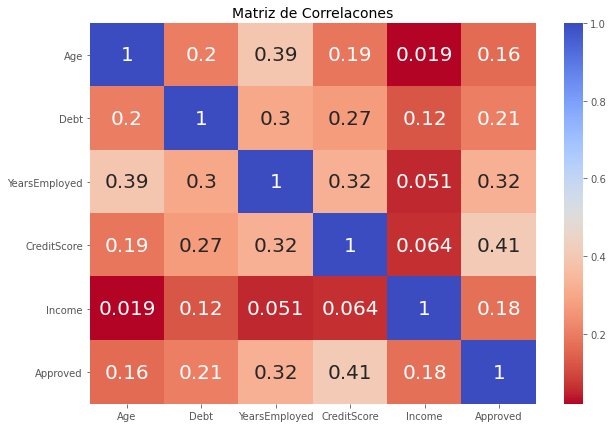

In [41]:
# Matriz de Correlaciones, no se presenta Multicolinealidad
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Matriz de Correlacones', fontsize=14)
plt.show()

## 7. Codificando Variables Categóricas

In [42]:
# Arreglando variables dummy, no olvides quitar la variable objetivo, esa la mapeas a parte
for i in columnas_object:
  dummy=pd.get_dummies(df[i], prefix=i, drop_first=True)  #Puedes poner pd.get_dummies(dataset[i], prefix=i, drop_first=True) para borrar
  df = df.drop(i, axis = 1)
  df=pd.concat([df, dummy], axis=1)

df.head()  

# CUIDADO con el índice en concat pudes poner: dataset=pd.concat([dataset, dummy], axis=1, ignore_index=True)

,Age,Debt,YearsEmployed,CreditScore,Income,Approved,Gender_b,Married_l,Married_u,Married_y,BankCustomer_g,BankCustomer_gg,BankCustomer_p,EducationLevelw_b,EducationLevelw_c,EducationLevelw_cc,EducationLevelw_d,EducationLevelw_e,EducationLevelw_ff,EducationLevelw_i,EducationLevelw_j,EducationLevelw_k,EducationLevelw_m,EducationLevelw_q,EducationLevelw_r,EducationLevelw_w,EducationLevelw_x,Ethnicity_bb,Ethnicity_dd,Ethnicity_ff,Ethnicity_h,Ethnicity_j,Ethnicity_n,Ethnicity_o,Ethnicity_v,Ethnicity_z,PriorDefault_t,Employed_t,Citizen_p,Citizen_s
0,27,1.540,3.750,5,3,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,42,4.915,3.165,0,1442,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,27,0.585,0.250,2,500,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,25,0.500,0.875,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,56,12.250,1.250,4,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0


## 8. Dividir el conjunto de datos en conjuntos de entrenamiento y test
<p> Hemos convertido correctamente todos los valores no numéricos en valores numéricos. </p>
<p> Ahora, dividiremos nuestros datos en un conjunto de entrenamiento y test para preparar los datos para dos fases diferentes del modelado de aprendizaje automático: entrenamiento y pruebas. Idealmente, no se debe usar ninguna información de los datos de prueba para escalar los datos de entrenamiento o se debe usar para dirigir el proceso de entrenamiento de un modelo de aprendizaje automático. Por lo tanto, primero dividimos los datos y luego aplicamos la escala. </p>
<p> Además, funciones como <code> DriversLicense </code> y <code> ZipCode </code> no son tan importantes como las otras funciones del conjunto de datos para predecir las aprobaciones de tarjetas de crédito. Deberíamos descartarlos para diseñar nuestro modelo de aprendizaje automático con el mejor conjunto de características. En la literatura sobre ciencia de datos, esto a menudo se denomina <em> selección de características </em>. </p>

In [43]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X=df.drop('Approved', axis=1)
y=df['Approved']


In [44]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [45]:
# NOTA: Reescalar los datos No da mejores resultados
# from sklearn.preprocessing import MinMaxScaler
# Instanciar MinMaxScaler y lo usamos para reescalar X_train y X_test
# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX_train = scaler.fit_transform(X_train)
# rescaledX_test = scaler.transform(X_test)

## 9. Ajuste de un modelo de regresión logística 
<p> Básicamente, predecir si una solicitud de tarjeta de crédito será aprobada o no es una tarea de  clasificación. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names"> Según UCI </a>, nuestro conjunto de datos contiene más instancias que corresponden a Estado "No Aprobado" que las instancias correspondientes al estado "Aprobado". Específicamente, de 690 casos, hay 383 (55,5%) aplicaciones que fueron denegadas y 307 (44,5%) aplicaciones que fueron aprobadas. </p>

Debido a la naturaleza del problema de clasificación y al contar con variables dictotómicas se propone un modelo de regresión logística.

In [46]:
# Librerías 
from sklearn.model_selection import KFold,  cross_val_score
# Algoritmo
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools.tools import add_constant


# Métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
# Importando el modelo LogisticRegression
from sklearn.linear_model import LogisticRegression

# Algoritmo de regresión logística
logreg = LogisticRegression(max_iter=1000)

# Entrenando el modelo
logreg.fit(X_train,y_train)

# Accuracy de los datos de entrenamiento
print("Accuracy datos de entrenamiento: ", logreg.score(X_train,y_train))
# Accuracy de los datos de test
print("Accuracy datos de test: ", logreg.score(X_test,y_test))

Accuracy datos de entrenamiento:  0.8674948240165632
Accuracy datos de test:  0.893719806763285


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 10. Hacer predicciones y evaluar el desempeño
<p> Pero, ¿qué tan bien funciona nuestro modelo? </p>
<p> Ahora evaluaremos nuestro modelo en el conjunto de prueba con respecto a la <a href="https://developers.google.com/machine-learning/crash-course/classification/accuracy"> precisión de clasificación </a> . Pero también echaremos un vistazo a la <a href="http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/"> matriz de confusión </a> del modelo. En el caso de predecir aplicaciones de tarjetas de crédito, es igualmente importante ver si nuestro modelo de aprendizaje automático es capaz de predecir el estado de aprobación de las aplicaciones como denegadas que originalmente fueron denegadas. Si nuestro modelo no está funcionando bien en este aspecto, entonces podría terminar aprobando la aplicación que debería haber sido aprobada. La matriz de confusión nos ayuda a ver el desempeño de nuestro modelo desde estos aspectos. </p>

In [48]:
# Predicciones del modelo
y_pred = logreg.predict(X_test)

# Accuracy
print(accuracy_score(y_test, y_pred))

# Precision
print(precision_score(y_test, y_pred))

# Recall
print(recall_score(y_test, y_pred)) 
    
# f1 score
print(f1_score(y_test, y_pred))

# Reporte    
print(classification_report(y_test, y_pred))

0.893719806763285
0.8823529411764706
0.9
0.8910891089108911
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       107
           1       0.88      0.90      0.89       100

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



In [49]:
# Se crea un dataframe con valor real y las predicciones
df_predicciones = pd.DataFrame({'Real' : y_test, 'Prediccion' : y_pred})
df_predicciones.head()

,Real,Prediccion
358,1,1
207,0,0
230,1,0
28,1,1
325,1,1


Matriz de confusión
[[95 12]
 [10 90]]


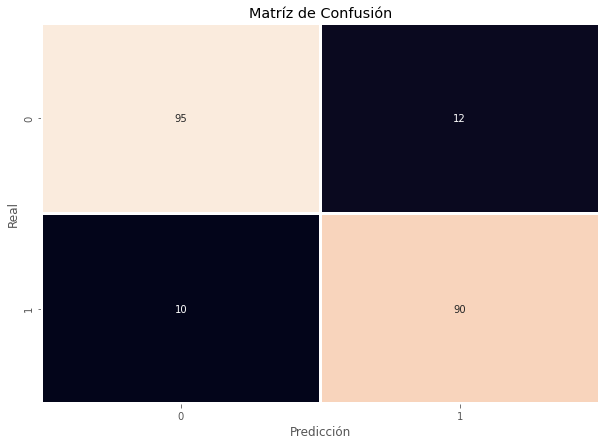

In [50]:
# Matriz de Confusión
print("Matriz de confusión")
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

df_cm = pd.crosstab(df_predicciones['Real'], df_predicciones['Prediccion'], rownames=['Real'], colnames=['Predicción'])
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, fmt="d", linewidths=2, cbar=False)
plt.title("Matríz de Confusión")
plt.show()

AUC:  0.9405607476635514
AUC: 0.94


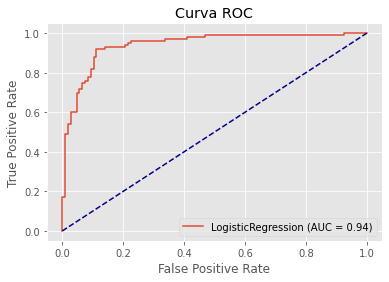

In [51]:
# Probabilidades
probs = logreg.predict_proba(X_test)
probs = probs[:,1]

auc = roc_auc_score(y_test, probs)
print('AUC: ', auc) 
print('AUC: %.2f' % auc)

# Curva ROC

plot_roc_curve(logreg, X_test, y_test)
plt.title("Curva ROC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.show()

In [52]:
# Evaluando el Pipeline usando Validación Cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=1)
# precision, recall, f1, roc_auc
scores = cross_val_score(logreg, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# Resumen rendimiento del modelo
print('Acurracy: %.3f +/- (%.3f)' % (np.mean(scores), np.std(scores)))

Acurracy: 0.926 +/- (0.039)


Utilizando librería de statmodels para ver las estadísticas.

In [53]:
X0 = add_constant(X)
model0 = Logit(y,X0)
modelfit=model0.fit()
modelfit.summary()

         Current function value: 0.287867
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Approved   No. Observations:                  690
Model:                          Logit   Df Residuals:                      654
Method:                           MLE   Df Model:                           35
Date:                Fri, 06 Aug 2021   Pseudo R-squ.:                  0.5810
Time:                        18:09:58   Log-Likelihood:                -198.63
converged:                      False   LL-Null:                       -474.08
Covariance Type:            nonrobust   LLR p-value:                 5.355e-94
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.0832        nan        nan        nan         nan         nan
Age                    0.0124      0.013      0.927      0.354      -0.014       0.039
Debt                  -0.0029      0.029     -0.099      0.921      -0.059       0.054
YearsEmployed          0.0506      0.050      1.018      0.309      -0.047       0.148
CreditScore            0.1258      0.059      2.128      0.033       0.010       0.242
Income                 0.0006      0.000      3.057      0.002       0.000       0.001
Gender_b              -0.0922      0.312     -0.295      0.768      -0.705       0.520
Married_l             -8.1000   1.48e+14  -5.47e-14      1.000    -2.9e+14     2.9e+14
Married_u            -22.3106        nan        nan        nan         nan         nan
Married_y            -22.6543        nan        nan        nan         nan         nan
BankCustomer_g       -22.3472        nan        nan        nan         nan         nan
BankCustomer_gg       -8.4616   1.49e+14  -5.66e-14      1.000   -2.93e+14    2.93e+14
BankCustomer_p       -22.7526        nan        nan        nan         nan         nan
EducationLevelw_b    -12.5324        nan        nan        nan         nan         nan
EducationLevelw_c      0.4458      0.506      0.881      0.378      -0.546       1.438
EducationLevelw_cc     1.4617      0.765      1.912      0.056      -0.037       2.960
EducationLevelw_d      0.0841      0.769      0.109      0.913      -1.423       1.591
EducationLevelw_e      1.6058      1.148      1.399      0.162      -0.644       3.855
EducationLevelw_ff    -3.8413      2.058     -1.866      0.062      -7.875       0.193
EducationLevelw_i     -0.0981      0.685     -0.143      0.886      -1.441       1.245
EducationLevelw_j     -4.2281      2.150     -1.967      0.049      -8.441      -0.015
EducationLevelw_k     -0.2113      0.621     -0.340      0.734      -1.429       1.006
EducationLevelw_m      0.1129      0.678      0.166      0.868      -1.216       1.442
EducationLevelw_q      0.4889      0.548      0.893      0.372      -0.584       1.562
EducationLevelw_r     -1.5318      4.133     -0.371      0.711      -9.632       6.568
EducationLevelw_w      0.8922      0.568      1.571      0.116      -0.221       2.005
EducationLevelw_x      2.3350      0.901      2.591      0.010       0.568       4.101
Ethnicity_bb           6.0970        nan        nan        nan         nan         nan
Ethnicity_dd           5.9452        nan        nan        nan         nan         nan
Ethnicity_ff           8.9154        nan        nan        nan         nan         nan
Ethnicity_h            6.7850        nan        nan        nan         nan         nan
Ethnicity_j           10.9849        nan        nan        nan         nan         nan
Ethnicity_n            9.3480        nan        nan        nan         nan         nan
Ethnicity_o          -11.9077        nan        nan        nan         nan         nan
Ethnicity_v           

## 11. Grid searching y mejora del rendimiento del modelo

<p> Se puede realizar una búsqueda de los hiperparámetros del modelo para mejorar la capacidad del mismo.</p>
<p> La implementación de scikit-learn de la regresión logística </a> consta de diferentes hiperparámetros, pero se buscará en cuadrícula los dos siguientes: </p>
<ul>
<li> tol </li>
<li> max_iter </li>
</ul>

<p>Cabe resaltar que esto puede tener un alto costo computacional</p>

In [54]:
# Importando GridSearchCV
from sklearn.model_selection import GridSearchCV

# Se define el grid para los hiperparámetros tol,  max_iter y solver
tol = [0.01, 0.001 ,0.0001]
max_iter = [100, 500, 1000]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 

# Se crea un diccionario donde tol, max_iter y solver son keys y la lista de valores sus correspondientes valores
param_grid = dict(tol=tol, max_iter=max_iter, solver=solver)

## 12. Encontrar el modelo con mejor rendimiento
<p> Se ha definido la cuadrícula de valores de hiperparámetros y los hemos convertido en un formato de diccionario único que <code> GridSearchCV () </code> espera como uno de sus parámetros. Ahora, comenzaremos la búsqueda en la cuadrícula para ver qué valores funcionan mejor. </p>
<p> Crearemos una instancia de <code> GridSearchCV () </code> con nuestro modelo anterior <code> logreg </code> con todos los datos que tenemos. En lugar de pasar el tren y los conjuntos de prueba por separado, proporcionaremos <code> X </code> (versión escalada) e <code> y </code>. También le indicaremos a <code> GridSearchCV () </code> que realice una validación cruzada de cinco pliegues. </p>
<p> Finalizaremos el cuaderno almacenando la puntuación mejor obtenida y los mejores parámetros respectivos. </p>


In [55]:
# GridSearchCV con el modelo y los hiperparámetros
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenando el modelo con los mejores hiperparámetros
grid_model_result = grid_model.fit(X, y)

# Resumen de resultados
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Mejor Score: %f usando los hiperparámetros %s" % (best_score, best_params))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Mejor Score: 0.860870 usando los hiperparámetros {'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 13. Guardar el modelo
<p> Se guarda el modelo en formato joblib para poder exportarlo, la idea sería ahora su puesta en producción. </p>

In [56]:
# Guardar en jobllib
joblib.dump(logreg, 'model.joblib')

['model.joblib']

In [57]:
# Cargar
mi_modelo = joblib.load('model.joblib')

In [58]:
# Prueba
mi_modelo.score(X_test, y_test)

0.893719806763285